Créer les utilisateurs et leurs liens


In [13]:
import json
import random

In [14]:
noms = json.load(open('nom.json', 'r', encoding='utf8'))
prenoms = json.load(open('prenom.json', 'r', encoding='utf8'))

In [15]:
# Création des personnes

data = {}

print(len(prenoms))

for prenom in prenoms:
    nbPersonne = random.randint(1, len(noms))
    for x in range(nbPersonne):
        if random.random() < 0.8:
            age = random.randint(15, 20)
        else:
            age = random.randint(20, 30)
        nom = random.choice(noms)
        uid = prenom[0] + nom.lower().replace(' ', '_') + str(random.randint(1, 1000000)) 
        structure = {
            "prenom":  prenom,
            "nom": nom , 
            "age": age 
            }

        data[uid] = structure

"""d = open('dataV2.json', 'w', encoding='utf8')
d.write(json.dumps(data, indent=4, ensure_ascii=False))
d.close()"""



405


"d = open('dataV2.json', 'w', encoding='utf8')\nd.write(json.dumps(data, indent=4, ensure_ascii=False))\nd.close()"

In [16]:
data = json.load(open('data.json', encoding='utf8'))

## Nouveau système de stockage des  liens


#### Structure des liens :



##### Rapidité de la fonction getLiens(id) +++++

##### Rapidité de la fonction getCercleLien(id, degres) +++

In [17]:
#      --- Génération de liens simple ---
#      Génération faite au hasard qui ne comporte pas de logique particulière

def generateLiens():
    liensFinal = {}
    for personne in data:
        liensFinal[personne['id']] = []
    for personne in data:
        nbLiens = random.randint(5, 15)
        for i in range(nbLiens):
            randomPersonne = random.choice(data)
            if randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in liensFinal[personne['id']]:
                liensFinal[personne['id']].append(randomPersonne['id'])
            if personne['id'] not in liensFinal[randomPersonne['id']]:
                liensFinal[randomPersonne['id']].append(personne['id'])
    db = open('liensBon.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))
                



#      --- Génération de liens plus complexe ---
#      L'algorithme va chercher à créer des groupes de personnes qui ont des liens entre elles et va créer des liens entre les groupes

def generateLiens2():
    liensFinal = {}
    for personne in data:
        liensFinal[personne['id']] = []
    for personne in data:

        nbGroupeAmis = random.randint(5, 10)
        nbPersonneExterieur = random.randint(0, 5)
        personnes = []
        personnesExterieur = []
        randomPersonne = random.choice(data)
        for i in range(nbGroupeAmis):
            while randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in personnes and randomPersonne['id'] not in personnesExterieur:
                personnes.append(randomPersonne['id'])
                randomPersonne = random.choice(data)

        for i in range(nbPersonneExterieur):
            while randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in personnes and randomPersonne['id'] not in personnesExterieur:
                personnesExterieur.append(randomPersonne['id'])


    db = open('liensBon.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))


In [18]:
# generateLiens()

In [19]:
liensFinals = json.load(open('liensBon.json', 'r', encoding='utf-8'))

In [20]:
randomPersonne = random.choice(data)

In [21]:
liensFinals[randomPersonne['id']]

['apaul766678',
 'farmand541565',
 'hvallee568779',
 'lterrier167305',
 'lcharbonnier995108',
 'achevalier657805',
 'cjosse832657',
 'blebreton403853',
 'mmenard662224',
 'hlecomte784147',
 'cjoly510090',
 'lfelix622431',
 'mlouis244645',
 'jlombard1687',
 'lgrenier837777',
 'mlefrancois167439',
 'mblanchet680966',
 'rdubreuil759050',
 'srenou273866',
 'srigaud461234',
 'ttissier445961',
 'tsoulie94286',
 'tvincent759954',
 'yallain243820']

In [22]:
def getCercleLiens(_id_, _degres_):
    liensFormate = []

    try :
        liens = liensFinals[_id_]
    except KeyError:
        print("L'id : ", _id_, " n'existe pas")
        return
    
    #print("L'id : ", _id_, " a ", len(liens), " liens")
    #print(liens)


    if _degres_ == 1:
        for lien in liens:
            liensFormate.append([lien, _degres_])
        return liensFormate
    

    elif _degres_ == 2:
        liens1 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 1])
            liens1.append(lien)
        #print(liens1)
        for lien2 in liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                if lien not in liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_])
        return liensFormate

    elif _degres_ == 3:
        _liens1 = []
        _liens2 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 2])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                if lien not in _liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_ - 1])
                    _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensFinals[lien3]
            for lien in liens3:
                if lien not in _liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_])
                    _liens1.append(lien)
        
        return liensFormate



In [23]:
cercle = getCercleLiens(randomPersonne['id'], 3)
print(len(cercle))

9317


In [24]:
allLiens = [len(liensFinals[personne['id']]) for personne in data]

In [25]:
personnesTirees = []
nbPersonneCercle2 = []
nbPersonneCercle3 = []
for x in range(1000):
    if x % 100 == 0:
        # afficher une barre droite pour voir l'avancement
        print('|', end='')
    personneTiree = random.choice(data)
    if personneTiree['id'] not in personnesTirees:
        personnesTirees.append(personneTiree['id'])
        nbPersonneCercle2.append(len(getCercleLiens(personneTiree['id'], 2)))
        nbPersonneCercle3.append(len(getCercleLiens(personneTiree['id'], 3)))

|

KeyboardInterrupt: 

In [26]:
print('Nombre de liens moyen :', sum(allLiens) / len(allLiens))
print('Nombre de liens total :', sum(allLiens))
print('Nombre de personnes :', len(allLiens))
print('\n')
print('Nombre de liens maximum :', max(allLiens))
print('Nombre de liens minimum :', min(allLiens))
print('\n')

print('Ce test a été réalisé sur '+str(len(personnesTirees))+' personnes')
print('\n')
print('Nombre de personnes dans le cercle 2 moyen :', sum(nbPersonneCercle2) / len(nbPersonneCercle2))
print('Nombre minimum de personnes dans le cercle 2 :', min(nbPersonneCercle2))
print('Nombre maximum de personnes dans le cercle 2 :', max(nbPersonneCercle2))
print('\n')
print('Nombre de personnes dans le cercle 3 moyen :', sum(nbPersonneCercle3) / len(nbPersonneCercle3))
print('Nombre minimum de personnes dans le cercle 3 :', min(nbPersonneCercle3))
print('Nombre maximum de personnes dans le cercle 3 :', max(nbPersonneCercle3))


Nombre de liens moyen : 19.98670325628766
Nombre de liens total : 3532350
Nombre de personnes : 176735


Nombre de liens maximum : 41
Nombre de liens minimum : 5


Ce test a été réalisé sur 7 personnes


Nombre de personnes dans le cercle 2 moyen : 404.14285714285717
Nombre minimum de personnes dans le cercle 2 : 270
Nombre maximum de personnes dans le cercle 2 : 566


Nombre de personnes dans le cercle 3 moyen : 8224.833333333334
Nombre minimum de personnes dans le cercle 3 : 5345
Nombre maximum de personnes dans le cercle 3 : 11101


In [27]:
def getDoublons(liens):
    doublons = []
    total = 0
    for lien in liens:
        if liens.count(lien) > 1:
            doublons.append(lien)
            total += 1
    return total, doublons

In [28]:
getDoublons(cercle)

(2, [['gpierre790362', 2], ['gpierre790362', 2]])

In [29]:
def getPersonne(id):
    for personne in data:
        if personne['id'] == id:
            return personne

In [30]:
print(getPersonne(randomPersonne['id']))

{'prenom': 'jacques', 'nom': 'BLOT', 'age': 20, 'id': 'jblot191534'}


## Test de donnés structurés autrement - dataV2.json

In [31]:
data2 = json.load(open('dataV2.json', 'r', encoding='utf8'))

In [32]:
uidRandomUser = random.choice(list(data2.keys()))

In [33]:
data2[uidRandomUser]

{'prenom': 'romain', 'nom': 'ROBERT', 'age': 20}

Après plusieurs tests il s'avère que stocker les informatio de l'user sous forme 

    uid :{
        prenom: prenom,
        nom: nom,
        age: age,
    }

est moins optimisé que de stocker nos users dans un array tel que :

    [
        {
            prenom: prenom,
            nom: nom,
            age: age,
            uid: uid
        }
    ]




## Afficher nos liens à l'aide de networkx

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
liensEntreUser = json.load(open('liensBon2.json', 'r', encoding='utf8'))

In [36]:
allLiens = [len(liensEntreUser[personne['id']]) for personne in data]

In [37]:
print('Nombre de liens moyen :', sum(allLiens) / len(allLiens))
print('Nombre de liens total :', sum(allLiens))
print('Nombre de personnes :', len(allLiens))
print('\n')
print('Nombre de liens maximum :', max(allLiens))
print('Nombre de liens minimum :', min(allLiens))
print('Index de la personne avec le plus de liens :', allLiens.index(max(allLiens)))
print('Index de la personne avec le moins de liens :', allLiens.index(min(allLiens)))
print('\n')

Nombre de liens moyen : 12.437491159079979
Nombre de liens total : 2198140
Nombre de personnes : 176735


Nombre de liens maximum : 33
Nombre de liens minimum : 0
Index de la personne avec le plus de liens : 165257
Index de la personne avec le moins de liens : 4027




In [42]:
def getGraph(liens, _id_):
    print('Nombre de liens :', len(liens))
    G = nx.Graph()
    for lien in liens:
        if lien[1] == 1:
            G.add_edge(_id_, lien[0])
        elif lien[1] == 2:
            G.add_edge(lien[2], lien[0])
        elif lien[1] == 3:
            G.add_edge(lien[2], lien[0])
    return G

In [39]:
def getCercleLiensPoids(_id_, _degres_):
    liensFormate = []

    try :
        liens = liensEntreUser[_id_]
    except KeyError:
        print("L'id : ", _id_, " n'existe pas")
        return
    
    #print("L'id : ", _id_, " a ", len(liens), " liens")
    #print(liens)


    if _degres_ == 1:
        for lien in liens:
            liensFormate.append([lien, _degres_])
        return liensFormate
    

    elif _degres_ == 2:
        liens1 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 1])
            liens1.append(lien)
        #print(liens1)
        for lien2 in liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_, lien2])
        return liensFormate

    elif _degres_ == 3:
        _liens1 = []
        _liens2 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 2])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_ - 1, lien2])
                _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensFinals[lien3]
            for lien in liens3:
                liensFormate.append([lien, _degres_, lien3])
                _liens1.append(lien)
        
        return liensFormate


2
Nombre de liens : 197


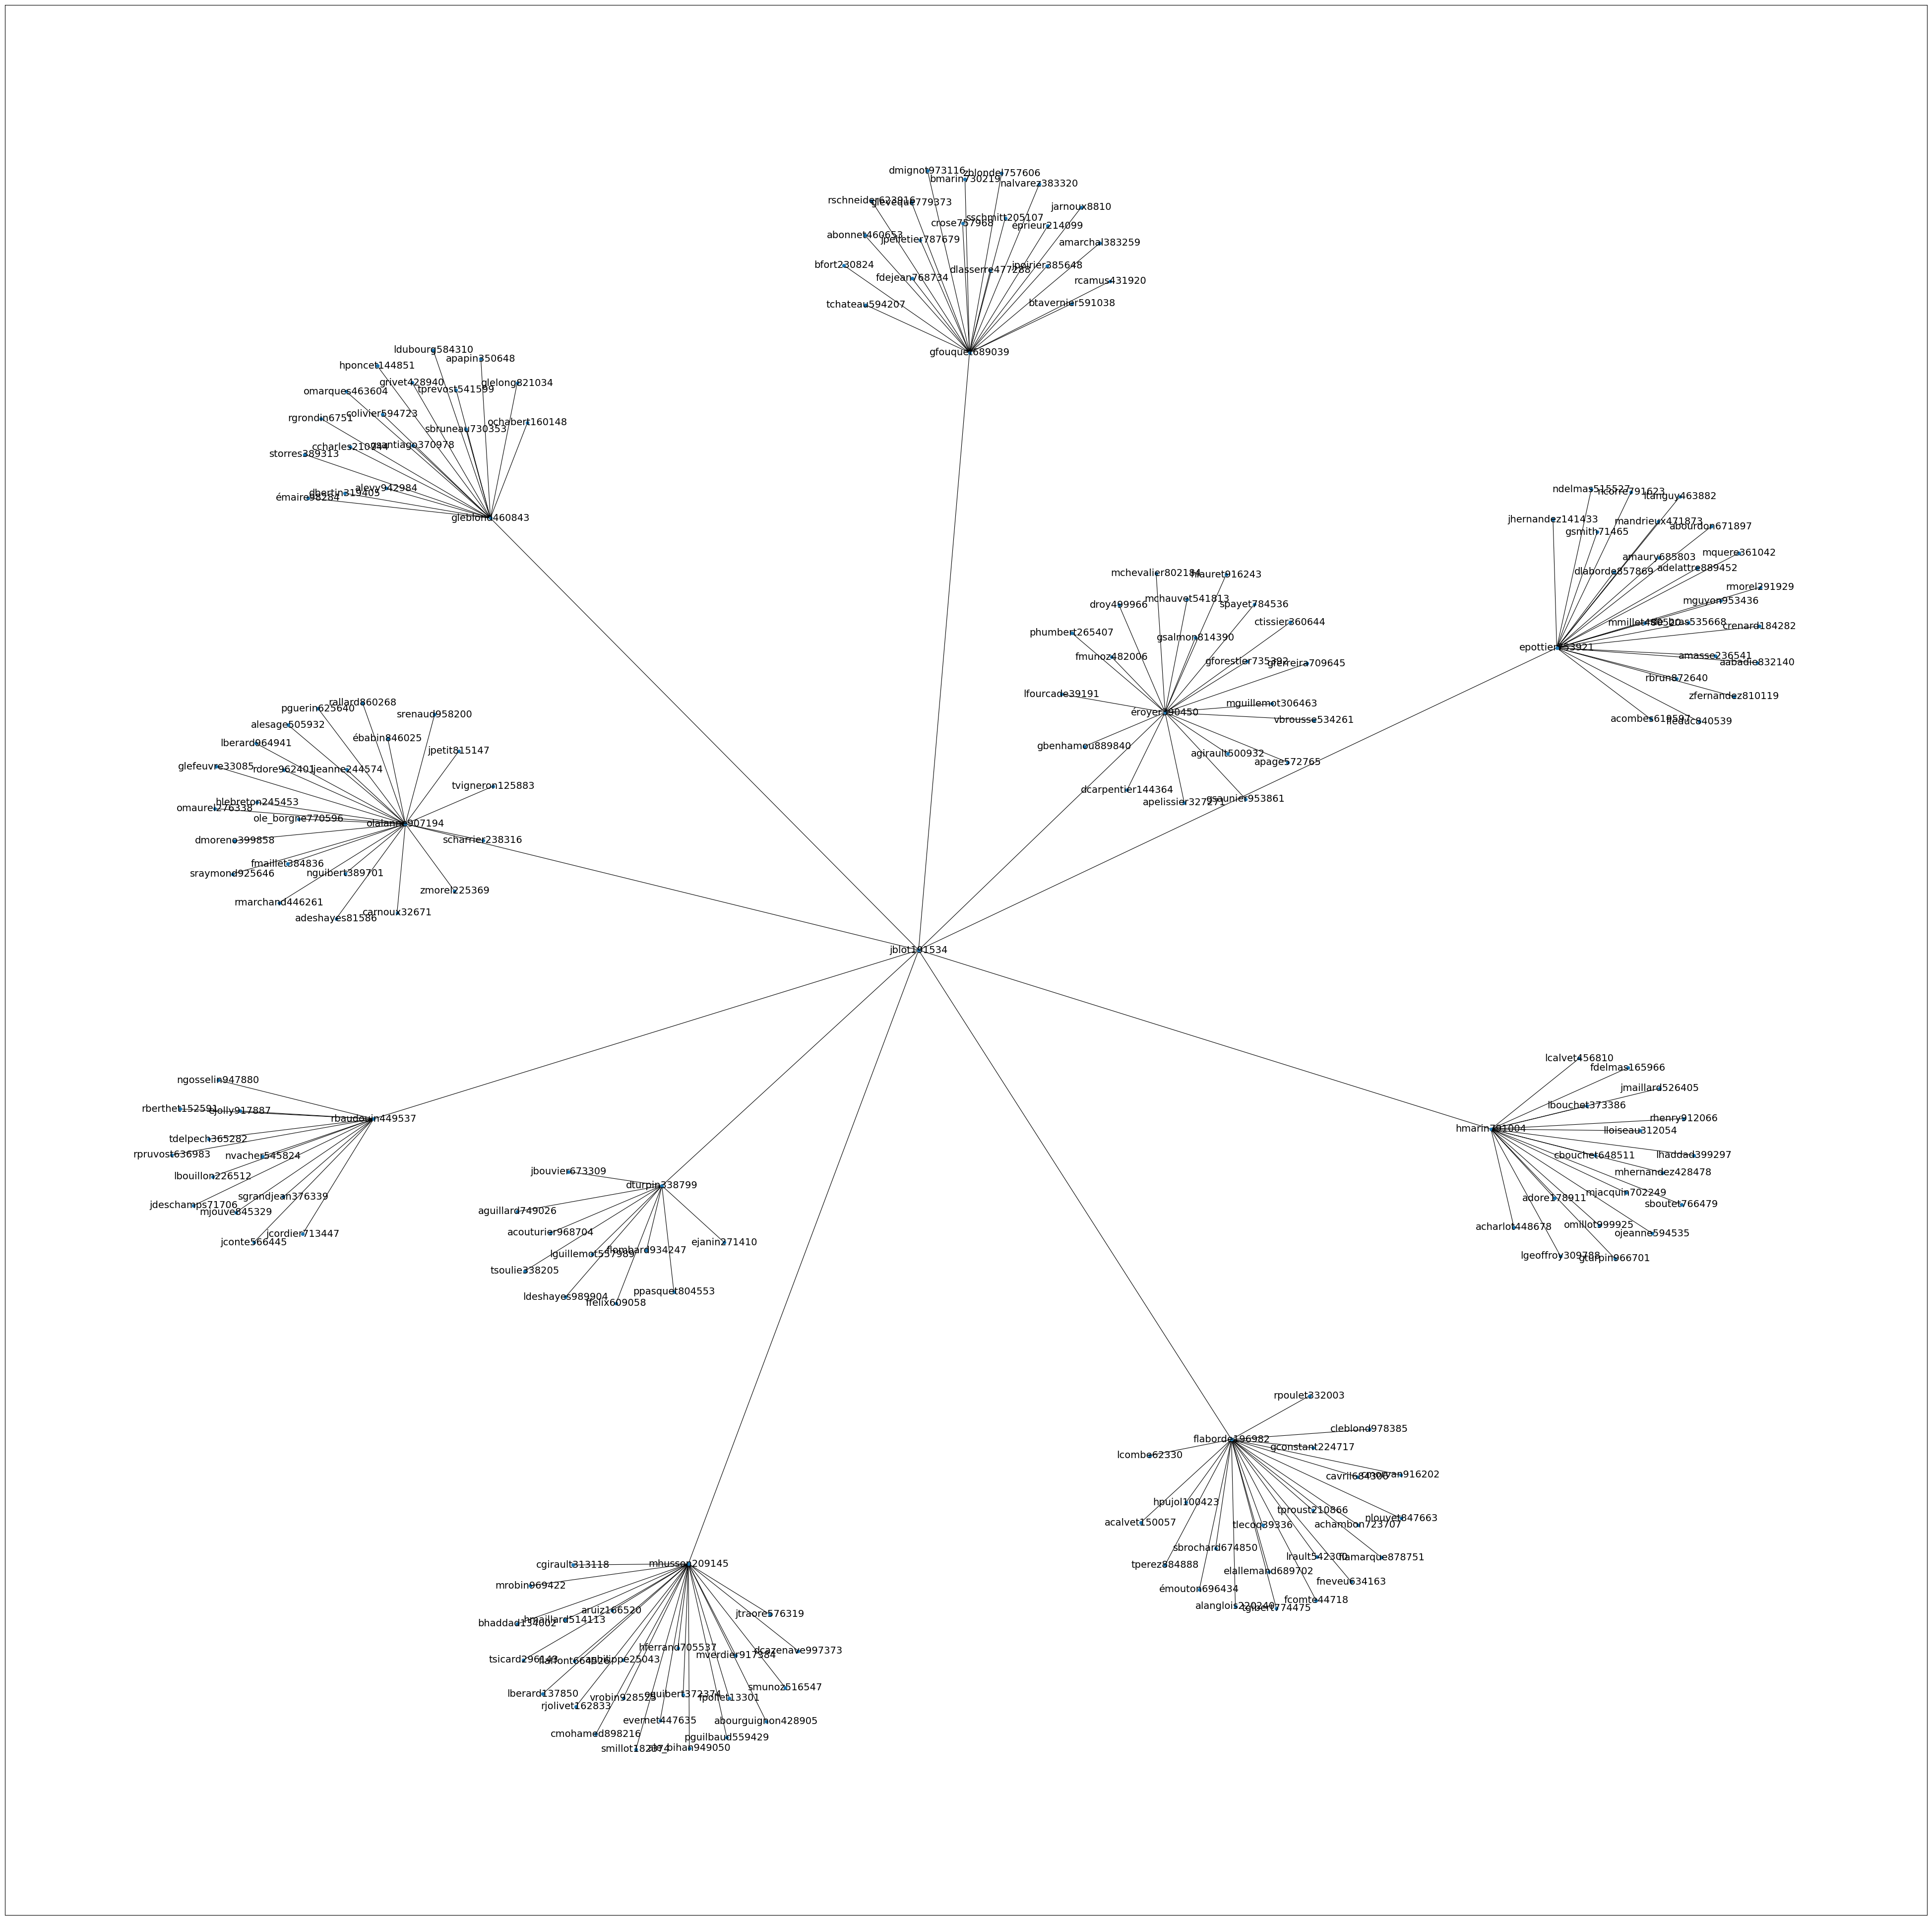

In [43]:
liensUser = getCercleLiensPoids(randomPersonne['id'], 2)
print(len(getDoublons(liensUser)))
g = getGraph(liensUser, randomPersonne['id'])
plt.figure(figsize=(50, 50))
nx.draw_networkx(g, with_labels=True, node_size=18, width=0.8, font_size=14)
plt.savefig("filename1.png")

In [41]:
userCercle = getCercleLiensPoids(randomPersonne['id'], 1)
for user in userCercle:
    print(randomPersonne['age'], getPersonne(user[0])['age'])


20 17
20 18
20 21
20 20
20 19
20 18
20 19
20 18
20 20
20 18
